In [67]:
# Import necessary libraries
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [68]:
# Define the folder path containing the CSV files  
folder_path = "C:\\Users\\marta\\OneDrive\\Escritorio\\archive"  # Cambia esto por la ruta a la carpeta donde están los archivos CSV
all_files = os.listdir(folder_path)

# Filter only csv files  
csv_files = [f for f in all_files if f.endswith('.csv')]

# Read each csv file into a dataFrame 
dfs = [pd.read_csv(os.path.join(folder_path, f)) for f in csv_files]

# Concatenate all dataFrames into a single
df = pd.concat(dfs, ignore_index=True)

In [69]:
# Exploring the dataset
df

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,Unnamed: 0
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990",NaN
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990",NaN
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990",NaN
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990",NaN
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790",NaN
...,...,...,...,...,...,...,...,...,...,...
1103165,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,https://m.media-amazon.com/images/I/71tHAR9pIY...,https://www.amazon.in/Adidas-Regular-Mens-Trac...,3.2,9,"₹3,449","₹4,599",NaN
1103166,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41pKrMZ5lQ...,https://www.amazon.in/Redwolf-Noice-Smort-Cott...,2.0,2,"₹1,199","₹1,999",NaN
1103167,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41n9u+zNSc...,https://www.amazon.in/Redwolf-Schrute-Farms-Ho...,4.0,1,"₹1,199","₹1,999",NaN
1103168,Puma Men Shorts,sports & fitness,Yoga,https://m.media-amazon.com/images/I/51LoWv5JDt...,https://www.amazon.in/Puma-Woven-Short-5208526...,4.4,37,NaN,NaN,NaN


In [70]:
# Remove currency symbols (₹) and commas before converting to numeric
df['discount_price'] = pd.to_numeric(df['discount_price'].replace({r'[₹,]': '', r'\s+': ''}, regex=True), errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'].replace({r'[₹,]': '', r'\s+': ''}, regex=True), errors='coerce')

# Convert ratings and number of ratings to numeric (removing commas and extra spaces)
df['ratings'] = pd.to_numeric(df['ratings'].replace({r',': ''}, regex=True), errors='coerce')
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'].replace({r',': '', r'\s+': ''}, regex=True), errors='coerce')

# Check data types after conversion
print(df.dtypes)


name               object
main_category      object
sub_category       object
image              object
link               object
ratings           float64
no_of_ratings     float64
discount_price    float64
actual_price      float64
Unnamed: 0        float64
dtype: object


In [71]:
# Drop unnecessary columns ('image', 'link', and 'Unnamed: 0') as they are not needed for analysis
df.drop(columns=['image', 'link','Unnamed: 0'],inplace=True)

In [72]:
# Check the number of NaN values in each column to decide how to handle them
df.isnull().sum()

name                   0
main_category          0
sub_category           0
ratings           364054
no_of_ratings     364054
discount_price    122326
actual_price       35626
dtype: int64

In [73]:
# Generate summary statistics for numerical columns 
df.describe()

,ratings,no_of_ratings,discount_price,actual_price
count,739116.000000,739116.000000,9.808440e+05,1.067544e+06
mean,3.832311,840.778698,2.623161e+03,2.311128e+04
std,0.756101,8651.530166,9.458191e+03,1.355081e+07
min,1.000000,1.000000,8.000000e+00,0.000000e+00
25%,3.500000,4.000000,3.890000e+02,9.900000e+02
50%,3.900000,20.000000,6.790000e+02,1.599000e+03
75%,4.300000,133.000000,1.399000e+03,2.999000e+03
max,5.000000,589547.000000,1.249990e+06,9.900000e+09


In [74]:
# QUESTION 1: What is the average price of Air Conditioners?
# Filter products in the 'Air Conditioner' sub-category
ac_df = df[df['sub_category'].str.contains('Air Conditioner', case=False, na=False)]

# Calculate the average actual price
precio_promedio_ac = ac_df['actual_price'].mean()
print(precio_promedio_ac)

54815.22724


In [75]:
# Calculate the average discounted price of Air Conditioners
precio_promedio_ac = ac_df['discount_price'].mean()
print(precio_promedio_ac)

40756.00656455142


In [76]:
# Calculate the average of the discount price, filling NaN values with the actual price
media_total = (ac_df['discount_price'].fillna(ac_df['actual_price']).mean())

print(media_total)

38725.54924


In [77]:
# The average price of Air Conditioners, taking the discount_price and actual_price if no discount is available, 
# is ₹38,725.55

In [78]:
# QUESTION 2: Which categories contain products with the highest prices?
# Group by category and calculate the maximum price
max_price_category = df.groupby('main_category')['actual_price'].max().sort_values(ascending=False)

# Display the categories with the highest prices
print("Categories with the highest prices:")
print(max_price_category.head())

Categories with the highest prices:
main_category
home & kitchen         9.900000e+09
sports & fitness       6.108299e+07
tv, audio & cameras    1.594900e+06
accessories            1.200000e+06
stores                 1.200000e+06
Name: actual_price, dtype: float64


In [79]:
# Create a new column 'final_price' by filling NaN values in 'discount_price' with 'actual_price'
df['final_price'] = df['discount_price'].fillna(df['actual_price'])

# Group by category and calculate the maximum price using the 'final_price'
max_price_category = df.groupby('main_category')['final_price'].max().sort_values(ascending=False)

# Display the categories with the highest prices
print("Categories with the highest prices:")
print(max_price_category.head())


Categories with the highest prices:
main_category
tv, audio & cameras    1249990.0
accessories             499999.0
stores                  406009.0
kids' fashion           406009.0
appliances              230000.0
Name: final_price, dtype: float64


In [80]:
# The category with the highest prices, taking the discount_price and actual_price if no discount is available, 
# is 'TV, Audio & Cameras'

Correlation between price and ratings: 0.07883656891609363


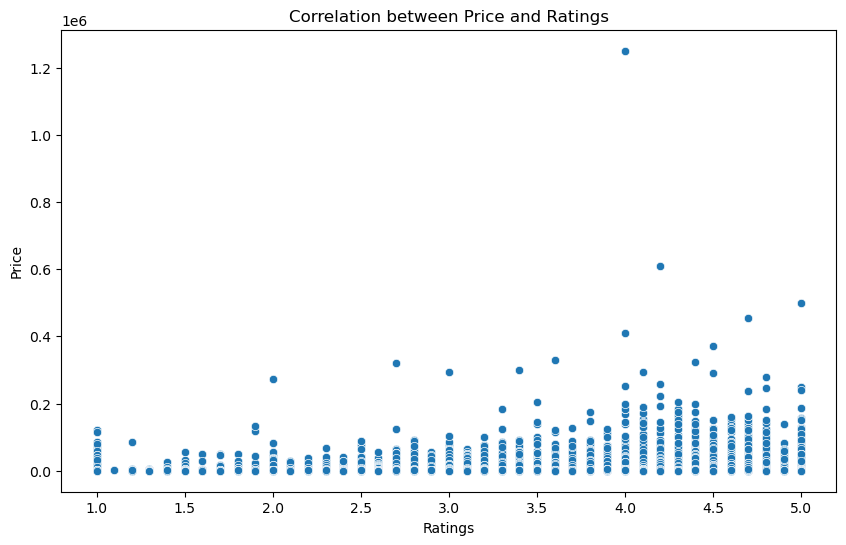

In [81]:
# QUESTION 3: Is there a correlation between price and ratings for the products?
# Calculate the correlation between final price and ratings
correlation = df['final_price'].corr(df['ratings'])
print(f"Correlation between price and ratings: {correlation}")

# Visualize the relationship between price and ratings
plt.figure(figsize=(10, 6))
sb.scatterplot(data=df, x='ratings', y='final_price')
plt.title('Correlation between Price and Ratings')
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.show()


In [82]:
# The correlation between price and ratings is 0.0788, which is a very weak positive correlation. 
# However, from the scatter plot, we can observe a slight trend where higher prices tend to have higher ratings, 
# although this relationship is not strong.


In [83]:
# QUESTION 4: What is the price range depending on the subcategory type?
# Group by subcategory and calculate the price range (min and max) using the final price
price_range_subcategory = df.groupby('sub_category')['final_price'].agg(['min', 'max'])

# Display the price ranges by subcategory
print("Price ranges by subcategory:")
print(price_range_subcategory)


Price ranges by subcategory:
                                 min       max
sub_category                                  
Air Conditioners              199.00  128800.0
All Appliances                 20.00   83990.0
All Car & Motorbike Products   33.00   27007.0
All Electronics                10.00  149900.0
All Exercise & Fitness         51.92   29990.0
...                              ...       ...
Washing Machines               99.00  230000.0
Watches                        99.00  113750.0
Western Wear                   90.00   49999.0
Women's Fashion                27.00   64111.0
Yoga                          115.52   16614.0

[112 rows x 2 columns]


In [84]:
# The price ranges (min and max) vary significantly across different subcategories. 
# For example, the 'Air Conditioners' subcategory has a price range from ₹199 to ₹128,800, 
# while 'Washing Machines' ranges from ₹99 to ₹230,000. 
# This indicates that the products within each subcategory can have wide price variations.
